<a href="https://colab.research.google.com/github/Lancerty/classification-models/blob/main/classification_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Decision Trees**

In [1]:
# Libraries
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

**Data Set**

In [3]:
df =pd.read_csv('churndata.csv')

In [4]:
X = df.drop(['Account Length', 'Churn?'], axis =1)
Y = df['Churn?']

**Data Splitting**

In [5]:
df = pd.read_csv("churndata.csv")

d = {'yes': 1, 'no': 0}
df["Int'l Plan"] = df["Int'l Plan"].map(d)
d = {'yes': 1, 'no': 0}
df['VMail Plan'] = df['VMail Plan'].map(d)
d = {'True.': 1, 'False.': 0}
df['Churn?'] = df['Churn?'].map(d)

features = ['Account Length', "Int'l Plan", 'VMail Plan', 'VMail Message', 
            'Day Mins', 'Day Calls', 'Day Charge', 'Eve Mins', 'Eve Calls', 
            'Eve Charge', 'Night Mins', 'Night Calls', 'Night Charge', 'Intl Mins', 
            'Intl Calls', 'Intl Charge', 'CustServ Calls']
            
X = df[features]
y = df['Churn?']

**Decision Trees**

Evaluation and Fitting

In [6]:
# Build and fit the tree
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3,min_samples_leaf=5)
clf.fit(X,y)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5)

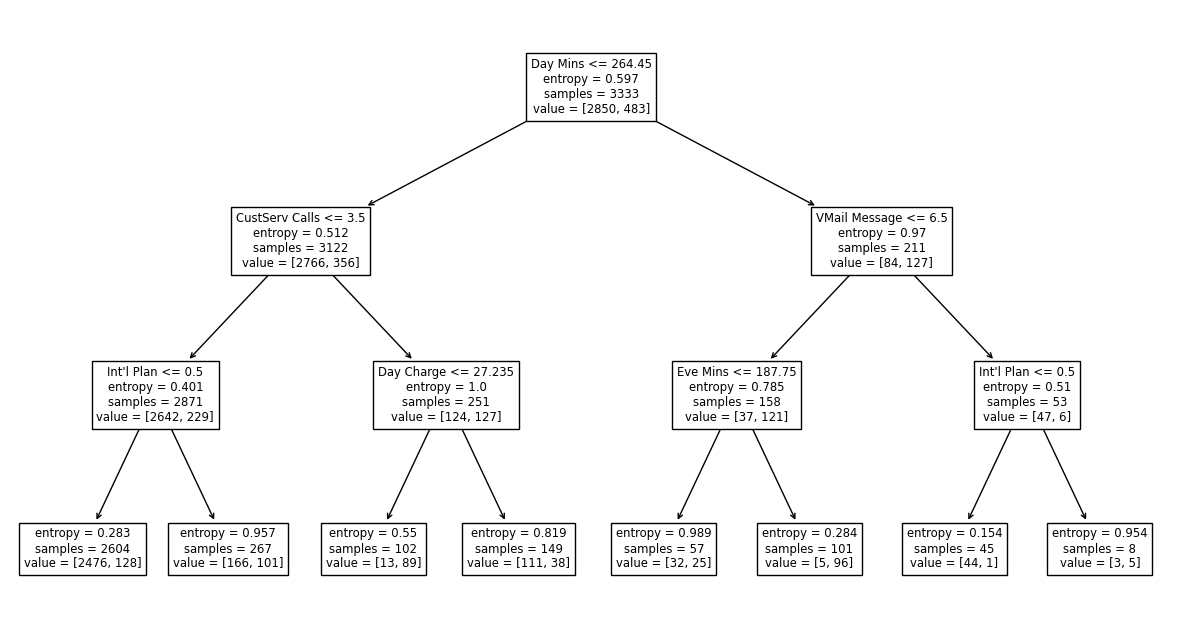

In [7]:
# Plot the decision tree
fig, ax = plt.subplots(figsize=(15, 8))
tree.plot_tree(clf,ax=ax,feature_names=features)
plt.show()

**Rule-Based Classifier**

In [8]:
!pip install wittgenstein

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.6/110.6 kB 3.8 MB/s eta 0:00:00


In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import wittgenstein as lw
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [10]:
X = df.drop(['Account Length', 'Churn?'], axis =1)
Y = df['Churn?']

In [11]:
X_train, X_test = train_test_split(df, test_size=.30)

In [15]:
clf = lw.RIPPER()
clf.fit(X_train, class_feat='Churn?',pos_class='True.', random_state=42)
clf


irep/ripper.py: .fit: DeprecationWarning: 
In the future, you should assign these parameters when initializating classifier instead of during model fitting: ['random_state']



[]


ripper.py: .fit: RuntimeWarning: 
No positive samples. Existing target labels=[0, 1].

ripper.py: .fit | base.py: ._check_allpos_allneg: RuntimeWarning: 
Ruleset is empty. All predictions it makes with method .predict will be negative. It may be untrained or was trained on a dataset split lacking positive examples.



In [14]:
clf.ruleset_.out_pretty()

[]


**Naive Bayes**

In [16]:
import matplotlib.pyplot as plt

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay, roc_auc_score

In [18]:
d = {'yes': 1, 'no': 0}
df["Int'l Plan"] = df["Int'l Plan"].map(d)
d = {'yes': 1, 'no': 0}
df['VMail Plan'] = df['VMail Plan'].map(d)
d = {'True.': 1, 'False.': 0}
df['Churn?'] = df['Churn?'].map(d)
X = df.drop(['Churn?'], axis=1)
y = df['Churn?']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [22]:
# Build a Gaussian Classifier
model = GaussianNB()

# Model training
model.fit(X_train, y_train)

# Predict Output
predicted = model.predict(X_test)

print("Actual Value:", y_test)
print("Predicted Value:", predicted)

ValueError: ignored

In [23]:
accuracy = accuracy_score(y_test,predicted)
precision = precision_score(y_test,predicted)
recall = recall_score(y_test, predicted)
roc_auc = roc_auc_score(y_test, predicted)
cm = confusion_matrix(y_test, predicted)
ConfusionMatrixDisplay(confusion_matrix=cm).plot()
print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)
print("ROC-AUC: ", roc_auc)

NameError: ignored